# Data Incubator Fellowship Semifinalist Challenge

<a href="mailto:wen.g.gong@gmail.com">Wen Gong</a>


## Motivation

<br>

<font color=red size=+3>Know what you eat, </font>

<font color=green size=+3> Gain insight into food.</font>


<a href=https://world.openfoodfacts.org/>
<img src=https://static.openfoodfacts.org/images/misc/openfoodfacts-logo-en-178x150.png width=300 height=200>
</a>

<br>

<font color=blue size=+2>What can be learned from the Open Food Facts dataset? </font>


In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### User-defined functions

In [3]:
def remove_na_rows(df, cols=None):
    """
    remove row with NaN in any column
    """
    if cols is None:
        cols = df.columns
    return df[np.logical_not(np.any(df[cols].isnull().values, axis=1))]

def trans_country_name(x):
    """
    translate country name to code (2-char)
    """
    try:
        country_name = x.split(',')[0]
        if country_name in dictCountryName2Code:
            return dictCountryName2Code[country_name]
    except:
        return None

def parse_additives(x):
    """
    parse additives column values into a list
    """
    try:
        dict = {}
        for item in x.split(']'): 
            token = item.split('->')[0].replace("[", "").strip() 
            if token: dict[token] = 1
        return [len(dict.keys()),  sorted(dict.keys())]
    except:
        return None

def trans_serving_size(x):
    """
    pick up gram value from serving_size column
    """
    try:
        serving_g = float((x.split('(')[0]).replace("g", "").strip())
        return serving_g
    except:
        return 0.0

def distplot2x2(cols):
    """
    make dist. plot on 2x2 grid for up to 4 features   
    """
    sb.set(style="white", palette="muted")
    f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=False)
    b, g, r, p = sb.color_palette("muted", 4)
    colors = [b, g, r, p]
    axis = [axes[0,0],axes[0,1],axes[1,0],axes[1,1]]
    for n,col in enumerate(cols):
        sb.distplot(food[col].dropna(), hist=True, rug=False, color=colors[n], ax=axis[n])

## Load dataset

https://www.kaggle.com/openfoodfacts/world-food-facts

This dataset contains Food Nutrition Fact for 100 000+ food products from 150 countries.

<img src=https://static.openfoodfacts.org/images/products/00419796/front_en.3.full.jpg>

In [4]:
food = pd.read_excel("data/openfoodfacts_100k.xlsx")

In [6]:
food.shape
# (99999, 162)

(99999, 162)

In [7]:
food.columns

Index([                            'code',                              'url',
                                'creator',                        'created_t',
                       'created_datetime',                  'last_modified_t',
                 'last_modified_datetime',                     'product_name',
                           'generic_name',                         'quantity',
       ...
                                'ph_100g',      'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g',                       'cocoa_100g',
                        'chlorophyl_100g',            'carbon-footprint_100g',
                'nutrition-score-fr_100g',          'nutrition-score-uk_100g',
                    'glycemic-index_100g',              'water-hardness_100g'],
      dtype='object', length=162)

In [8]:
food.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blÃ© noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pre-processing data

### Drop less useful columns

In [9]:
# columns_to_keep = ['code','product_name','created_datetime','brands','categories','origins','manufacturing_places','energy_100g','fat_100g','saturated-fat_100g','trans-fat_100g','cholesterol_100g','carbohydrates_100g','sugars_100g','omega-3-fat_100g','omega-6-fat_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g','alcohol_100g','vitamin-a_100g','vitamin-c_100g','potassium_100g','chloride_100g','calcium_100g','phosphorus_100g','iron_100g','magnesium_100g','zinc_100g','copper_100g','manganese_100g','fluoride_100g','ingredients_text','countries','countries_en','serving_size','additives','nutrition_grade_fr','nutrition_grade_uk','nutrition-score-fr_100g','nutrition-score-uk_100g','url','image_url','image_small_url']


columns_to_keep = ['code','product_name','created_datetime','brands','energy_100g','fat_100g','saturated-fat_100g','trans-fat_100g','cholesterol_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g','vitamin-a_100g','vitamin-c_100g','calcium_100g','iron_100g','ingredients_text','countries','countries_en','serving_size','additives','nutrition_grade_fr','nutrition-score-fr_100g','url']

In [10]:
food = food[columns_to_keep]

### Fix missing value

In [11]:
columns_numeric_all = ['energy_100g','fat_100g','saturated-fat_100g','trans-fat_100g','cholesterol_100g','carbohydrates_100g','sugars_100g','omega-3-fat_100g','omega-6-fat_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g','alcohol_100g','vitamin-a_100g','vitamin-c_100g','potassium_100g','chloride_100g','calcium_100g','phosphorus_100g','iron_100g','magnesium_100g','zinc_100g','copper_100g','manganese_100g','fluoride_100g','nutrition-score-fr_100g','nutrition-score-uk_100g']

columns_numeric = set(columns_numeric_all) & set(columns_to_keep)

columns_categoric = set(columns_to_keep) - set(columns_numeric)

# turn off
if False:
    for col in columns_numeric:
        if not col in ['nutrition-score-fr_100g', 'nutrition-score-uk_100g']:
            food[col] = food[col].fillna(0)

    for col in columns_categoric:
        if col in ['nutrition_grade_fr', 'nutrition_grade_uk']:
            food[col] = food[col].fillna('-')
        else:        
            food[col] = food[col].fillna('')

In [12]:
# list column names: categoric vs numeric
columns_categoric, columns_numeric

({'additives',
  'brands',
  'code',
  'countries',
  'countries_en',
  'created_datetime',
  'ingredients_text',
  'nutrition_grade_fr',
  'product_name',
  'serving_size',
  'url'},
 {'calcium_100g',
  'carbohydrates_100g',
  'cholesterol_100g',
  'energy_100g',
  'fat_100g',
  'fiber_100g',
  'iron_100g',
  'nutrition-score-fr_100g',
  'proteins_100g',
  'salt_100g',
  'saturated-fat_100g',
  'sodium_100g',
  'sugars_100g',
  'trans-fat_100g',
  'vitamin-a_100g',
  'vitamin-c_100g'})

In [13]:
food.head(3)

,code,product_name,created_datetime,brands,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,...,calcium_100g,iron_100g,ingredients_text,countries,countries_en,serving_size,additives,nutrition_grade_fr,nutrition-score-fr_100g,url
0,3087,Farine de blÃ© noir,2016-09-17T09:17:46Z,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,en:FR,France,NaN,NaN,NaN,NaN,http://world-en.openfoodfacts.org/product/0000...
1,4530,Banana Chips Sweetened (Whole),2017-03-09T14:32:37Z,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,...,0.000,0.00129,"Bananas, vegetable oil (coconut oil, corn oil ...",US,United States,28 g (1 ONZ),[ bananas -> en:bananas ] [ vegetable-oil -...,d,14.0,http://world-en.openfoodfacts.org/product/0000...
2,4559,Peanuts,2017-03-09T14:32:37Z,Torn & Glasser,1941.0,17.86,0.00,0.0,0.000,60.71,...,0.071,0.00129,"Peanuts, wheat flour, sugar, rice flour, tapio...",US,United States,28 g (0.25 cup),[ peanuts -> en:peanuts ] [ wheat-flour -> ...,b,0.0,http://world-en.openfoodfacts.org/product/0000...


### Standardize country code

In [14]:
# standardize country
country_lov = pd.read_excel("../../0.0-Datasets/country_cd.xlsx")

# country_lov.shape

# country_lov.head()

# country_lov[country_lov['GEOGRAPHY_NAME'].str.startswith('United')].head()

# country_lov['GEOGRAPHY_CODE'].tolist()

# country_lov.ix[0,'GEOGRAPHY_CODE'], country_lov.ix[0,'GEOGRAPHY_NAME']

# create 2 dictionaries
dictCountryCode2Name = {}
dictCountryName2Code = {}
for i in country_lov.index:
    dictCountryCode2Name[country_lov.ix[i,'GEOGRAPHY_CODE']] = country_lov.ix[i,'GEOGRAPHY_NAME']
    dictCountryName2Code[country_lov.ix[i,'GEOGRAPHY_NAME']] = country_lov.ix[i,'GEOGRAPHY_CODE']    

In [15]:
# add Country_Code column - pick 1st country from list
food['countries_en'] = food['countries_en'].fillna('')
food['country_code'] = food['countries_en'].apply(str).apply(lambda x: trans_country_name(x))

# add country_code to columns_categoric set
columns_categoric.add('country_code')

In [16]:
# verify bad country
food[food['country_code'] != food['countries']][['country_code', 'countries']].head(20)

,country_code,countries
0,FR,en:FR
46,FR,France
47,GB,en:GB
48,FR,en:FR
106,FR,"France,Ã‰tats-Unis"
136,FR,France
138,FR,"France, US"
153,GB,en:GB
154,GB,en:GB
174,CA,Canada


In [17]:
food['ingredients_text'].head()  # leave as is

0                                                  NaN
1    Bananas, vegetable oil (coconut oil, corn oil ...
2    Peanuts, wheat flour, sugar, rice flour, tapio...
3    Organic hazelnuts, organic cashews, organic wa...
4                                      Organic polenta
Name: ingredients_text, dtype: object

### Extract serving_size into gram value

In [18]:
# add serving_size in gram column
food['serving_size'].head(10)

0                NaN
1       28 g (1 ONZ)
2    28 g (0.25 cup)
3    28 g (0.25 cup)
4    35 g (0.25 cup)
5     52 g (0.5 cup)
6    45 g (0.25 cup)
7     64 g (0.5 cup)
8        40 g (40 g)
9      14 g (1 Tbsp)
Name: serving_size, dtype: object

In [19]:
food['serving_size'] = food['serving_size'].fillna('')
food['serving_size_gram'] = food['serving_size'].apply(lambda x: trans_serving_size(x))

# add serving_size_gram 
columns_numeric.add('serving_size_gram')

In [20]:
food[['serving_size_gram', 'serving_size']].head()

,serving_size_gram,serving_size
0,0.0,
1,28.0,28 g (1 ONZ)
2,28.0,28 g (0.25 cup)
3,28.0,28 g (0.25 cup)
4,35.0,35 g (0.25 cup)


### Parse additives

In [21]:
food['additives'].head(10)

0                                                  NaN
1     [ bananas -> en:bananas  ]  [ vegetable-oil -...
2     [ peanuts -> en:peanuts  ]  [ wheat-flour -> ...
3     [ organic-hazelnuts -> en:organic-hazelnuts  ...
4     [ organic-polenta -> en:organic-polenta  ]  [...
5     [ rolled-oats -> en:rolled-oats  ]  [ oats ->...
6     [ organic-long-grain-white-rice -> en:organic...
7     [ org-oats -> en:org-oats  ]  [ oats -> en:oa...
8     [ organic-chocolate-liquor -> en:organic-choc...
9     [ organic-expeller-pressed -> en:organic-expe...
Name: additives, dtype: object

In [22]:
food['additives'] = food['additives'].fillna('')
food['additive_list'] = food['additives'].apply(lambda x: parse_additives(x))

# add additive_list 
columns_categoric.add('additive_list')

In [23]:
food[['additive_list', 'additives']].head()

,additive_list,additives
0,"[0, []]",
1,"[14, [and-or-palm-oil-sugar, banana-flavor, ba...",[ bananas -> en:bananas ] [ vegetable-oil -...
2,"[19, [ammonium-bicarbonate, baking-soda, bicar...",[ peanuts -> en:peanuts ] [ wheat-flour -> ...
3,"[12, [almonds, cashews, hazelnuts, oil, organi...",[ organic-hazelnuts -> en:organic-hazelnuts ...
4,"[2, [organic-polenta, polenta]]",[ organic-polenta -> en:organic-polenta ] [...


### Organic or Not

[TODO]

* pick up word 'Organic' from product_name column
* pick up word 'Organic','org' from ingredients_text column

### Add creation_date

In [26]:
food["creation_date"] = food["created_datetime"].apply(str).apply(lambda x: x[:x.find("T")])

In [27]:
def extract_year(x):
    try:
        return int(x[:x.find("-")])
    except:
        return None
    
food["year_added"] = food["created_datetime"].dropna().apply(str).apply(extract_year)


# add creation_date 
columns_categoric.add('creation_date')
columns_numeric.add('year_added')

In [28]:
food[['created_datetime', 'creation_date', 'year_added']].head()

,created_datetime,creation_date,year_added
0,2016-09-17T09:17:46Z,2016-09-17,2016.0
1,2017-03-09T14:32:37Z,2017-03-09,2017.0
2,2017-03-09T14:32:37Z,2017-03-09,2017.0
3,2017-03-09T10:35:31Z,2017-03-09,2017.0
4,2017-03-09T10:34:13Z,2017-03-09,2017.0


In [29]:
# food['product_name']

food.head(3)

,code,product_name,created_datetime,brands,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,...,serving_size,additives,nutrition_grade_fr,nutrition-score-fr_100g,url,country_code,serving_size_gram,additive_list,creation_date,year_added
0,3087,Farine de blÃ© noir,2016-09-17T09:17:46Z,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,...,,,NaN,NaN,http://world-en.openfoodfacts.org/product/0000...,FR,0.0,"[0, []]",2016-09-17,2016.0
1,4530,Banana Chips Sweetened (Whole),2017-03-09T14:32:37Z,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,...,28 g (1 ONZ),[ bananas -> en:bananas ] [ vegetable-oil -...,d,14.0,http://world-en.openfoodfacts.org/product/0000...,US,28.0,"[14, [and-or-palm-oil-sugar, banana-flavor, ba...",2017-03-09,2017.0
2,4559,Peanuts,2017-03-09T14:32:37Z,Torn & Glasser,1941.0,17.86,0.00,0.0,0.000,60.71,...,28 g (0.25 cup),[ peanuts -> en:peanuts ] [ wheat-flour -> ...,b,0.0,http://world-en.openfoodfacts.org/product/0000...,US,28.0,"[19, [ammonium-bicarbonate, baking-soda, bicar...",2017-03-09,2017.0


In [30]:
columns_numeric

{'calcium_100g',
 'carbohydrates_100g',
 'cholesterol_100g',
 'energy_100g',
 'fat_100g',
 'fiber_100g',
 'iron_100g',
 'nutrition-score-fr_100g',
 'proteins_100g',
 'salt_100g',
 'saturated-fat_100g',
 'serving_size_gram',
 'sodium_100g',
 'sugars_100g',
 'trans-fat_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'year_added'}

## Visualize Food features

### Food labels yearly trend

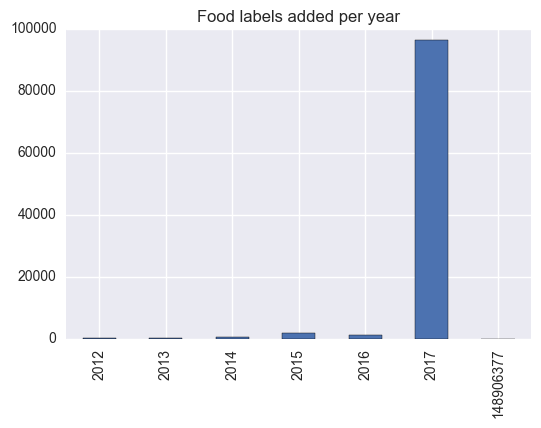

In [31]:
year_added = food['year_added'].value_counts().sort_index()
#year_added

year_i = [int(x) for x in year_added.index]
x_pos = np.arange(len(year_i))
year_added.plot.bar()
plt.xticks(x_pos, year_i)
plt.title("Food labels added per year")

### Top countries

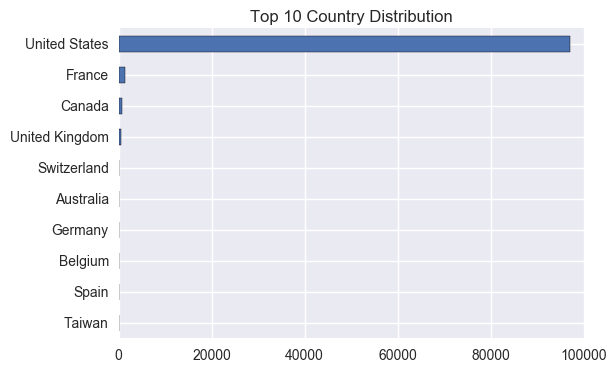

In [32]:
TOP_N = 10
dist_country = food['country_code'].value_counts()

top_country = dist_country[:TOP_N][::-1]
country_s = [dictCountryCode2Name[x] for x in top_country.index]
y_pos = np.arange(len(country_s))
top_country.plot.barh()
plt.yticks(y_pos, country_s)
plt.title("Top {} Country Distribution".format(TOP_N))

### Nutrition grade

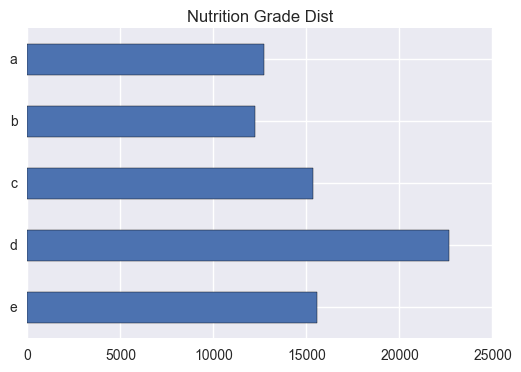

In [34]:
# dist_nutri_grade = food['nutrition_grade_uk'].value_counts()
# no value

dist_nutri_grade = food[food["nutrition_grade_fr"].isin(['a','b','c','d','e'])]
dist_nutri_grade = dist_nutri_grade['nutrition_grade_fr'].value_counts()

dist_nutri_grade.sort_index(ascending=False).plot.barh()
plt.title("Nutrition Grade Dist")

### Nutrition score

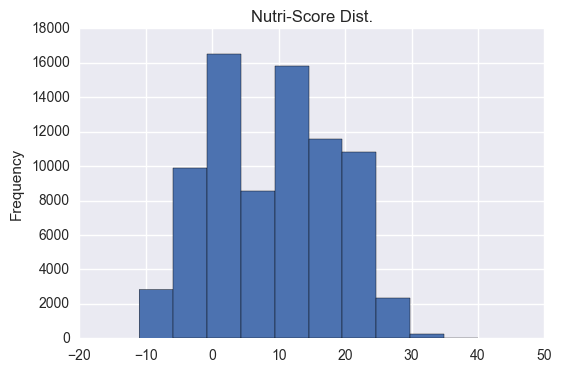

In [35]:
food['nutrition-score-fr_100g'].dropna().plot.hist()
plt.title("{} Dist.".format("Nutri-Score"))

### Serving size

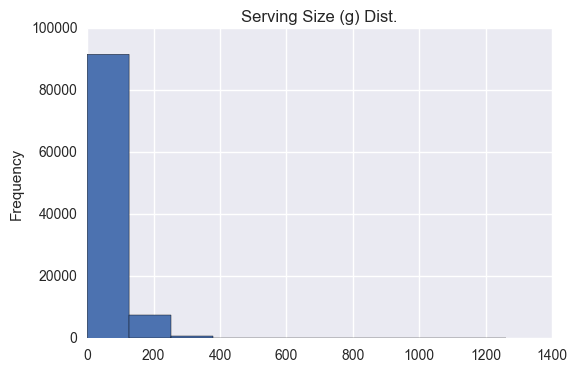

In [36]:
food['serving_size_gram'].dropna().plot.hist()
plt.title("{} Dist.".format("Serving Size (g)"))

### Energy, fat, ...

* Energy
* Fat
* Saturated-Fat
* Trans-Fat

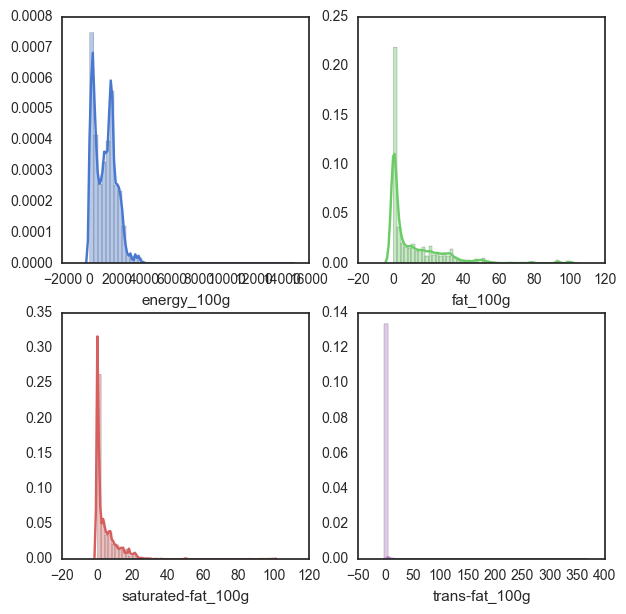

In [37]:
distplot2x2([ 'energy_100g','fat_100g','saturated-fat_100g','trans-fat_100g'])

### Carbohydrates, protein, fiber

* Carbohydrates
* Cholesterol
* Proteins
* Fiber

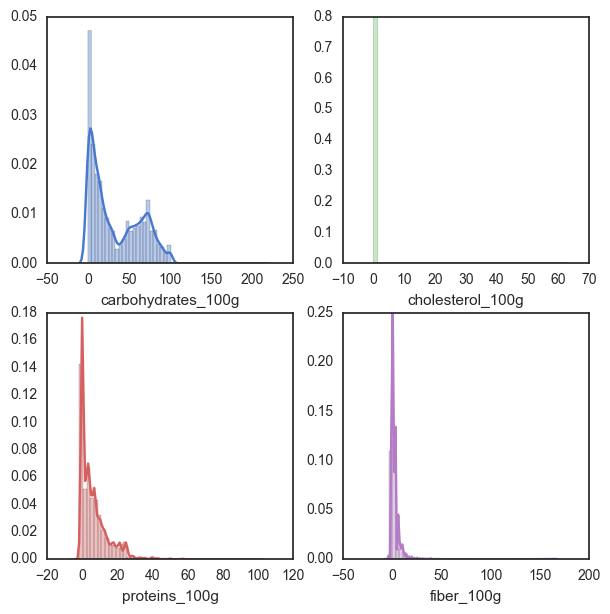

In [38]:
distplot2x2(['carbohydrates_100g', 'cholesterol_100g', 'proteins_100g', 'fiber_100g'])

### Sugar, Vitamins

* Sugars
* Salt
* Vitamin-A
* Vitamin-C

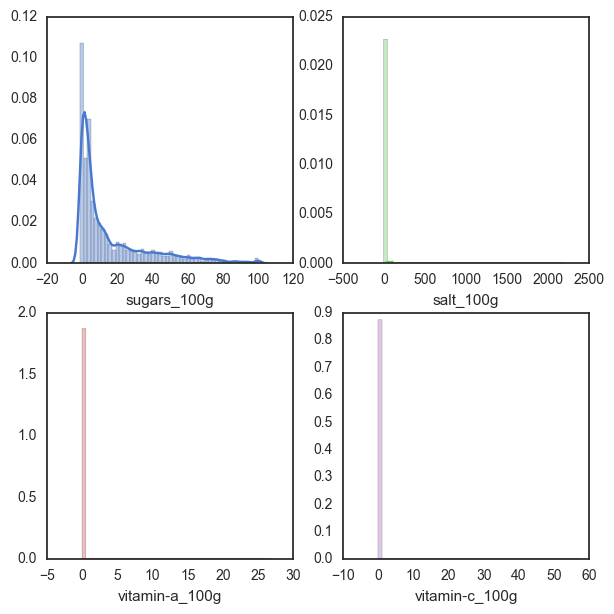

In [39]:
distplot2x2([ 'sugars_100g', 'salt_100g', 'vitamin-a_100g', 'vitamin-c_100g'])

### Minerals

* Calcium
* Iron
* Sodium

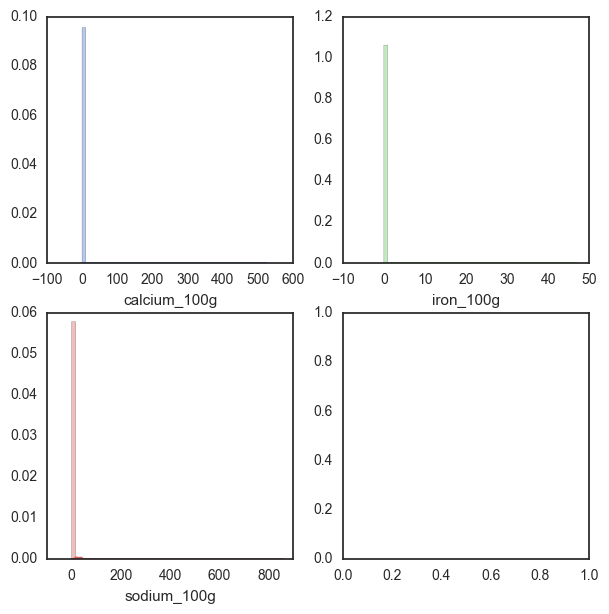

In [40]:
distplot2x2(['calcium_100g', 'iron_100g',  'sodium_100g'])

## Explore food label

### Are Amercan and French food different?

In [41]:
df = food[food["country_code"].isin(['US','FR'])][['energy_100g', 'carbohydrates_100g', 'sugars_100g','country_code']]

df = remove_na_rows(df)

df.head()

,energy_100g,carbohydrates_100g,sugars_100g,country_code
1,2243.0,64.29,14.29,US
2,1941.0,60.71,17.86,US
3,2540.0,17.86,3.57,US
5,1933.0,63.46,11.54,US
7,1833.0,57.81,15.62,US


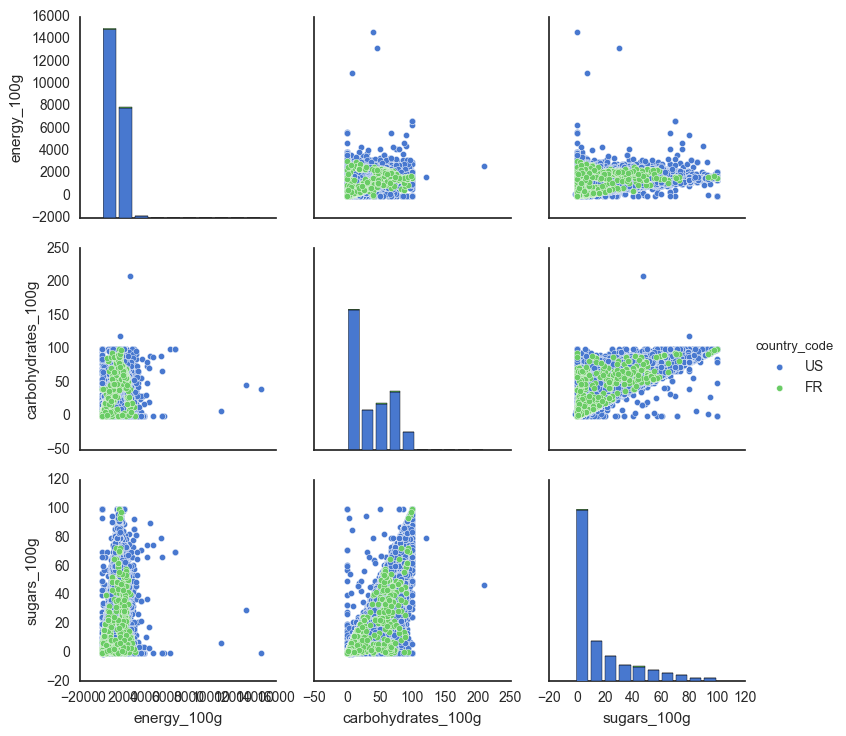

In [42]:
sb.pairplot(df, hue="country_code", size=2.5)

###  Who eats less sweet food?

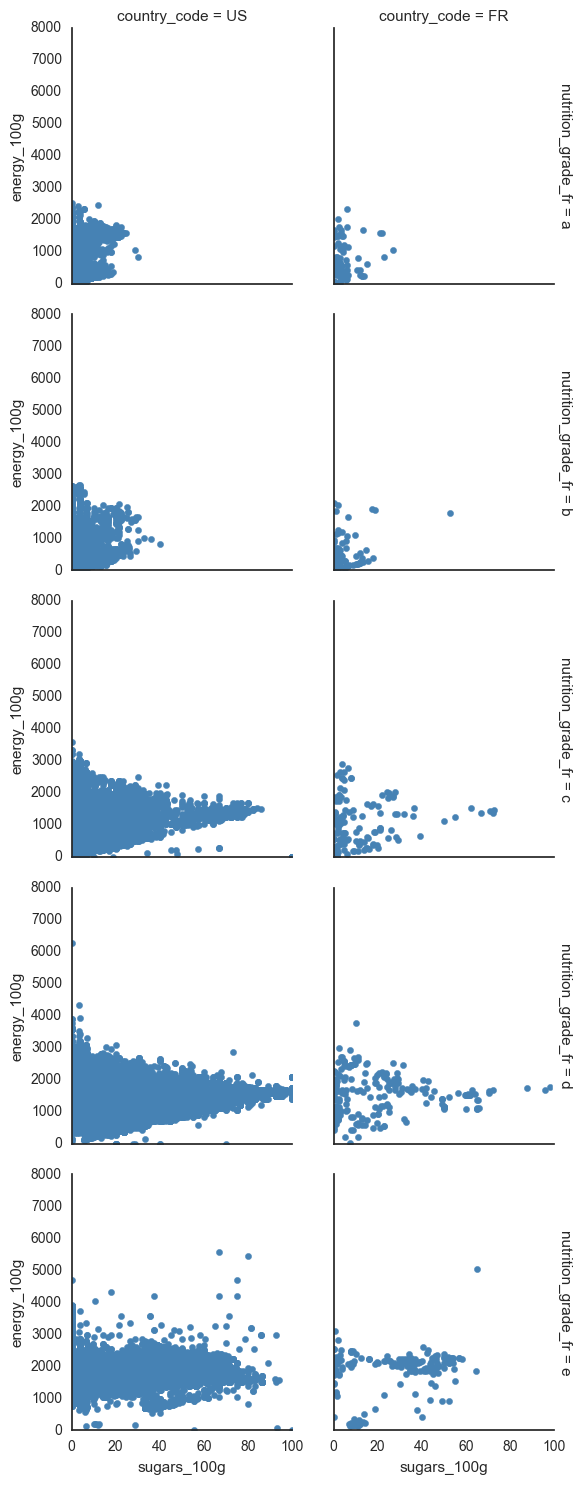

In [44]:
# prepare a small dataframe for ['US', 'FR']
df2 = food[food["country_code"].isin(['US','FR'])][['energy_100g', 'sugars_100g','country_code','nutrition_grade_fr']]
df2 = df2[df2["nutrition_grade_fr"].isin(['a','b','c','d','e'])]
df2 = df2.sort_values(by="nutrition_grade_fr")
# df2.head()

# create a grid of scatter plot
g = sb.FacetGrid(df2, row="nutrition_grade_fr", col="country_code", margin_titles=True)
g.map(plt.scatter, "sugars_100g", "energy_100g", color="steelblue")
g.set(xlim=(0, 100), ylim=(0, 8000))

## Food for thought

* Grade-A food has less sugar content than Grade E
* American food has more sugar than French food

### Future studies:

* Can we use machine learning to predict Nutrition Grade?
* Is health correlated with sugar intake?